# **CLASE 4: UNDERFITTING Y OVERFITTING.**
## Objetivo: Aprender a no "memorizar" los datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
ruta_archivo = "/content/Advertising.csv"
df = pd.read_csv(ruta_archivo)

## LA REGLA DE ORO: DIVIDIR LOS DATOS
Separamos datos para "Estudiar" (Train) y datos para el "Examen" (Test)


In [3]:
X_tv = df[['TV']]
X_tv_radio = df[['TV', 'Radio']]
X_all = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_tv, y, test_size=0.2, random_state=40)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_tv_radio, y, test_size=0.2, random_state=40)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_all, y, test_size=0.2, random_state=40)

In [12]:
def interpretacion_negocio(modelo_num, r2_train, r2_test, mae):

  """Permite la interpretación de los resultados del modelo en el negocio."""
  print(f"\n📊 INTERPRETACIÓN PARA NEGOCIOS - Modelo {modelo_num}:")

  # Diagnóstico de ajuste
  diff = r2_train - r2_test
  if diff > 0.10:
      print("⚠️  ALERTA: Posible OVERFITTING")
      print("   → Modelo muy específico para datos históricos")
      print("   → Riesgo: Mal desempeño en situaciones nuevas")
      print("\n🎯 RECOMENDACIÓN: Simplificar modelo o conseguir más datos")
  elif r2_train <= 0.6 or r2_test<= 0.6:
      print("⚠️  ALERTA: Posible UNDERFITTING")
      print("   → Modelo muy simple para capturar patrones")
      print("   → Riesgo: No aprovechar oportunidades")
  else:
      print("✅ MODELO BIEN AJUSTADO")
      print("   → Equilibrio entre simplicidad y precisión")
      print("\n🎯 RECOMENDACIÓN: Modelo listo para pruebas piloto")

  # Impacto económico
  print(f"\n💰 IMPACTO FINANCIERO:")
  print(f"   Error promedio: ${mae:,.2f}M por predicción")



### ENTRENAMIENTO (TV)

In [13]:
modelo1 = LinearRegression()
modelo1.fit(X_train1, y_train1)

# 4. EVALUACIÓN DE LA CAPACIDAD DE GENERALIZACIÓN
pred_train = modelo1.predict(X_train1)
pred_test = modelo1.predict(X_test1)

r2_entrenamiento = r2_score(y_train1, pred_train)
r2_examen = r2_score(y_test1, pred_test)

print(f"--- RESULTADOS DEL DIAGNÓSTICO ---")
print(f"R2 en Entrenamiento (TV): {r2_entrenamiento:.4f}")
print(f"R2 en Test (TV): {r2_examen:.4f}")

# 5. ANÁLISIS DE ERROR (En dólares reales)
mae = mean_absolute_error(y_test1, pred_test)
print(f"\nError Medio en el mundo real: {mae:.2f} M$")

--- RESULTADOS DEL DIAGNÓSTICO ---
R2 en Entrenamiento (TV): 0.6208
R2 en Test (TV): 0.5747

Error Medio en el mundo real: 2.58 M$


In [14]:
interpretacion_negocio(modelo1, r2_entrenamiento, r2_examen, mae)


📊 INTERPRETACIÓN PARA NEGOCIOS - Modelo LinearRegression():
⚠️  ALERTA: Posible UNDERFITTING
   → Modelo muy simple para capturar patrones
   → Riesgo: No aprovechar oportunidades

💰 IMPACTO FINANCIERO:
   Error promedio: $2.58M por predicción


### ENTRENAMIENTO (TV + RADIO)

In [15]:
modelo2 = LinearRegression()
modelo2.fit(X_train2, y_train2)

# 4. EVALUACIÓN DE LA CAPACIDAD DE GENERALIZACIÓN
pred_train = modelo2.predict(X_train2)
pred_test = modelo2.predict(X_test2)

r2_entrenamiento = r2_score(y_train2, pred_train)
r2_examen = r2_score(y_test2, pred_test)

print(f"--- RESULTADOS DEL DIAGNÓSTICO ---")
print(f"R2 en Entrenamiento (TV+Radio): {r2_entrenamiento:.4f}")
print(f"R2 en Test (TV+Radio): {r2_examen:.4f}")

# 5. ANÁLISIS DE ERROR (En dólares reales)
mae = mean_absolute_error(y_test2, pred_test)
print(f"\nError Medio en el mundo real: {mae:.2f} M$")

--- RESULTADOS DEL DIAGNÓSTICO ---
R2 en Entrenamiento (TV+Radio): 0.9199
R2 en Test (TV+Radio): 0.7991

Error Medio en el mundo real: 1.58 M$


In [16]:
interpretacion_negocio(modelo2, r2_entrenamiento, r2_examen, mae)


📊 INTERPRETACIÓN PARA NEGOCIOS - Modelo LinearRegression():
⚠️  ALERTA: Posible OVERFITTING
   → Modelo muy específico para datos históricos
   → Riesgo: Mal desempeño en situaciones nuevas

🎯 RECOMENDACIÓN: Simplificar modelo o conseguir más datos

💰 IMPACTO FINANCIERO:
   Error promedio: $1.58M por predicción


In [17]:
modelo3 = LinearRegression()
modelo3.fit(X_train3, y_train3)

# 4. EVALUACIÓN DE LA CAPACIDAD DE GENERALIZACIÓN
pred_train = modelo3.predict(X_train3)
pred_test = modelo3.predict(X_test3)

r2_entrenamiento = r2_score(y_train3, pred_train)
r2_examen = r2_score(y_test3, pred_test)

print(f"--- RESULTADOS DEL DIAGNÓSTICO ---")
print(f"R2 en Entrenamiento (Todos): {r2_entrenamiento:.4f}")
print(f"R2 en Test (Todos): {r2_examen:.4f}")

# 5. ANÁLISIS DE ERROR (En dólares reales)
mae = mean_absolute_error(y_test3, pred_test)
print(f"\nError Medio en el mundo real: {mae:.2f} M$")

--- RESULTADOS DEL DIAGNÓSTICO ---
R2 en Entrenamiento (Todos): 0.9201
R2 en Test (Todos): 0.7983

Error Medio en el mundo real: 1.58 M$


In [18]:
interpretacion_negocio(modelo3, r2_entrenamiento, r2_examen, mae)


📊 INTERPRETACIÓN PARA NEGOCIOS - Modelo LinearRegression():
⚠️  ALERTA: Posible OVERFITTING
   → Modelo muy específico para datos históricos
   → Riesgo: Mal desempeño en situaciones nuevas

🎯 RECOMENDACIÓN: Simplificar modelo o conseguir más datos

💰 IMPACTO FINANCIERO:
   Error promedio: $1.58M por predicción



Error Medio en el mundo real: 1.58 M$


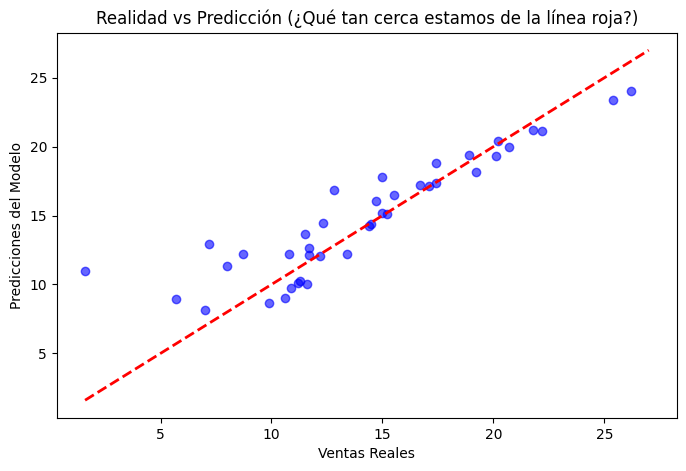

In [19]:
mae = mean_absolute_error(y_test3, pred_test)
print(f"\nError Medio en el mundo real: {mae:.2f} M$")

# 6. VISUALIZACIÓN DEL ERROR
plt.figure(figsize=(8,5))
plt.scatter(y_test3, pred_test, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Línea de perfección
plt.xlabel("Ventas Reales")
plt.ylabel("Predicciones del Modelo")
plt.title("Realidad vs Predicción (¿Qué tan cerca estamos de la línea roja?)")
plt.show()